# Recommender System

## collaborative filtering

* 사용자 기반 필터링

* 아이템 기반 필터링    
 사용자 수가 적거나 아이템이 적어서 의미있는 데이터를 추출하기 어려운 경우 사용

In [110]:
from math import sqrt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
font_name = font_manager.FontProperties(fname = 'C:/Windows/fonts/malgun.ttf' ).get_name()
rc('font',family=font_name)

In [111]:
critics = {
    'BTS' : {'암수살인' : 5, '바울' : 4, '할로윈' : 1.5},
    '손흥민' : {'바울' : 5, '할로윈' : 2},
    '조용필' : {'암수살인' : 2.5, '바울' : 2, '할로윈' : 1},
    '나훈아' : {'암수살인' : 3.5, '바울' : 4, '할로윈' : 5}     
}
print(critics.get('BTS').get('바울'))

4


In [112]:
def sim(i, j) :#전달된 두 데이터의 유사도를 리턴하는 함수
    return sqrt(pow(i,2)+pow(j,2)) #i : x2 - x1, j: y2-y1이 전달됨

# 손흥민과 나훈아 사이의 거리를 구하고 싶다
# 피타고라스의 정리 -> 거리가 가까울수록 유사도가 높다

var1 = critics['손흥민']['바울']-critics['나훈아']['바울']
var2 = critics['손흥민']['할로윈']-critics['나훈아']['할로윈']
print(sim(var1, var2))

3.1622776601683795


**손흥민을 기준으로 다른 사람과의 유사도 측정**

In [113]:
for i in critics:
#     print(i)  i는 key
   if i !='손흥민':
        var1 = critics['손흥민']['바울']-critics[i]['바울']
        var2 = critics['손흥민']['할로윈']-critics[i]['할로윈']
        print(i, "- 손흥민의 유사도 : ", 1/(1+sim(var1, var2))) # 거리가 짧을수록 유사도가 높다

BTS - 손흥민의 유사도 :  0.4721359549995794
조용필 - 손흥민의 유사도 :  0.2402530733520421
나훈아 - 손흥민의 유사도 :  0.2402530733520421


두 점 사이의 거리    
항목(영화) 데이터가 2종류(두 편)인 경우 : 피타고라스 공식    
항목(영화) 데이터가 여러종류(여러편)인 경우 : 유클리디안 거리

**유클리디안 거리 기반 두 데이터 사이의 거리**

In [114]:
def sim_distance(data, name1, name2):
    sum = 0
    for i in data[name1] : 
        if i in data[name2]:
            sum += pow(data[name1][i]-data[name2][i], 2)
    return 1/(1+sqrt(sum))
print(sim_distance(critics, '손흥민', '나훈아'))

0.2402530733520421


**손흥민과 나머지 전체 관객과의 평점간 거리: 유클리디안**

In [115]:
def matchf(data, name, idx = 3, sim = sim_distance):
    myList = []
    for i in data :
        if i != name:  #본인이 아닌 경우라면
            myList.append((sim(data, name, i),i)) #유사도, 상대방 이름
            myList.reverse()
            print("역순: ", myList)
    return myList[:idx]
# 내림차순 정렬(가장 먼저 나오는 사람이 손흥민과 가장 유사)
li = matchf(critics, '손흥민')
print(li)

역순:  [(0.4721359549995794, 'BTS')]
역순:  [(0.2402530733520421, '조용필'), (0.4721359549995794, 'BTS')]
역순:  [(0.2402530733520421, '나훈아'), (0.4721359549995794, 'BTS'), (0.2402530733520421, '조용필')]
[(0.2402530733520421, '나훈아'), (0.4721359549995794, 'BTS'), (0.2402530733520421, '조용필')]


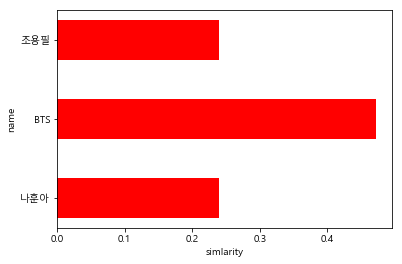

In [119]:
def barchart(data, labels): # 손흥민과의 유사도, 손흥민 제외한 이름
    position = range(len(data))
    plt.barh(position, data, height=0.5, color = 'r') #y축, x축, 막대 높이
    plt.yticks(position, labels)
    plt.xlabel('simlarity')
    plt.ylabel('name')
    plt.show()
score = []
names = []
for i in li :
    score.append(i[0])
    names.append(i[1])
barchart(score, names)


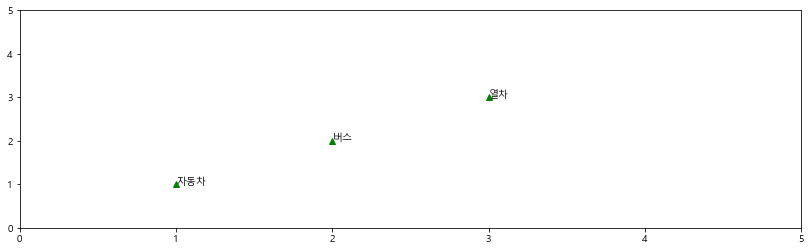

In [118]:
plt.figure(figsize = (14,4))
plt.plot([1,2,3], [1,2,3], 'g^')
plt.text(1,1,'자동차')
plt.text(2,2,'버스')
plt.text(3,3,'열차')
plt.axis([0,5,0,5]) #x,y 축에 대한 크기 재설정
plt.show()

* * * 

**상관분석**

상관분석을 이용하여 유클리디안 거리 공식의 한계점 극복 : 특정인의 점수가 극단적으로 높거나 낮다면 제대로된 결과를 도출해내기가 어렵다    
두 변수간의 선형적 관계를 분석함

In [116]:
critics = {
    '조용필': {'택시운전사': 2.5,'겨울왕국': 3.5,'리빙라스베가스': 3.0,'넘버3': 3.5,'사랑과전쟁': 2.5,'세계대전': 3.0},
    'BTS': {'택시운전사': 1.0,'겨울왕국': 4.5,'리빙라스베가스': 0.5,'넘버3': 1.5,'사랑과전쟁': 4.5,'세계대전': 5.0},
    '강감찬': {'택시운전사': 3.0,'겨울왕국': 3.5,'리빙라스베가스': 1.5,'넘버3': 5.0,'세계대전': 3.0,'사랑과전쟁': 3.5},
    '을지문덕': {'택시운전사': 2.5,'겨울왕국': 3.0,'넘버3': 3.5,'세계대전': 4.0},
    '김유신': {'겨울왕국': 3.5,'리빙라스베가스': 3.0,'세계대전': 4.5,'넘버3': 4.0,'사랑과전쟁': 2.5},
    '유성룡': {'택시운전사': 3.0,'겨울왕국': 4.0,'리빙라스베가스': 2.0,'넘버3': 3.0,'세계대전': 3.5,'사랑과전쟁': 2.0},
    '이황': {'택시운전사': 3.0,'겨울왕국': 4.0,'세계대전': 3.0,'넘버3': 5.0,'사랑과전쟁': 3.5},
    '이이': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,'넘버3': 4.0}
}

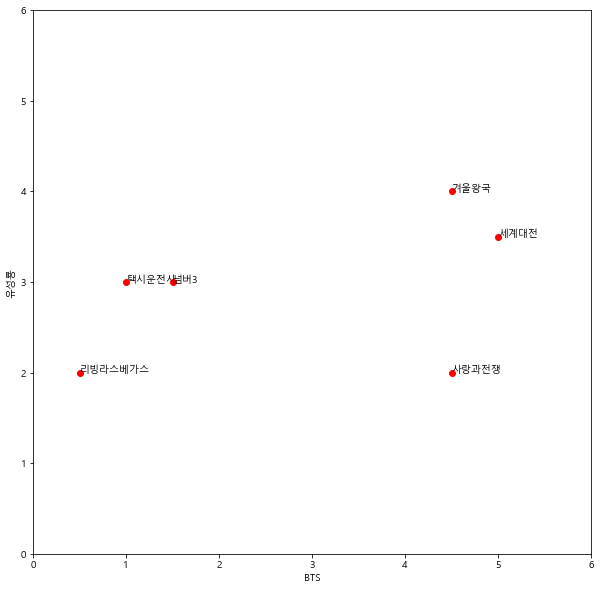

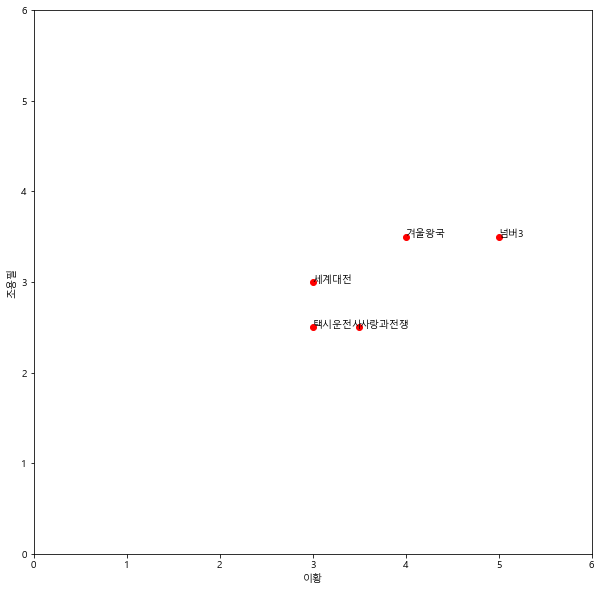

In [117]:
def drawGraph(data, name1, name2):
    plt.figure(figsize = (10,10))
    #plot하기 위한 좌표를 지정하는 list 정의
    li = [] #name1의 평점을 저장
    li2 = [] #name2의 평점을 저장
    for i in critics[name1]:
        if i in data[name2]: #같은 영화에 대한 평점이 있다면
            li.append(critics[name1][i]) #name1의 i영화에 대한 평점
            li2.append(critics[name2][i])
            plt.text(critics[name1][i],critics[name2][i], i)
    plt.plot(li, li2, 'ro')
    plt.axis([0,6,0,6])
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.show()
    
drawGraph(critics, 'BTS', '유성룡')
drawGraph(critics, '이황', '조용필')

* * *

**피어슨 상관계수**

x와 y가 함께 변하는 정도(공분산) / (x가 변하는정도 * y가 변하는정도)

In [121]:
def sim_pearson(data, name1, name2):
    sumX = 0     #x의 합
    sumY = 0     #y의 합
    sumPowX = 0  #x 제곱의 합
    sumPowY = 0  #y 제곱의 합
    sumXY = 0    #x*y의 합
    count = 0    #영화의 개수(n)
    
    for i in data[name1]:
        if i in data[name2]: #BTS와 유성룡이 모두 본 영화
            sumX += data[name1][i] #BTS의 i영화에 대한 평점
            sumY += data[name2][i] #유성룡의 i영화에 대한 평점
            sumPowX += pow(data[name1][i],2)
            sumPowY += pow(data[name2][i],2)
            sumXY += data[name1][i]*data[name2][i]
            count += 1
            
    return (sumXY-((sumX*sumY)/count)) / sqrt((sumPowX-(pow(sumX,2)/count))*(sumPowX-(pow(sumX,2)/count)))
    
print("BTS와 유성룡의 피어슨 상관계수: ", sim_pearson(critics,'BTS', '유성룡'))
print("이황고 조용필의 피어슨 상관계수 : ",sim_pearson(critics, '이황', '조용필'))

BTS와 유성룡의 피어슨 상관계수:  0.16399999999999987
이황고 조용필의 피어슨 상관계수 :  0.4464285714285719


**딕셔너리를 수행하면서 기준(BTS)과 다른 데이터(사람)와의 상관계수 구하기**   
(내림차순 정렬)

In [131]:
def top_match(data, name, index=2, sim_function = sim_pearson): 
    #(영화평점딕셔너리, 기준이되는 사람의 이름, 피어슨상관계수에서 가장 가까운 몇명을 선택할 것인가, 피어슨 함수 호출 지정)
    li = []
    for i in data: # 전체 영화를 돌겠다
        if name != i: #자신이(BTS) 아니라면
            li.append((sim_function(critics, name, i), i))
    li.sort()
    li.reverse()
    return li[:index]
    
top_match(critics, 'BTS', 3) #BTS와 성향이 가장 비슷한 3명 추출

[(0.18, '을지문덕'), (0.16399999999999987, '유성룡'), (0.11999999999999998, '강감찬')]

* * *

**영화를 추천하는 시스템 구성, 예상되는 평점 출력**

### 추천시스템 구성 순서   
* 자신을 제외한 나머지 사람들과의 평점에 대한 유사도를 구함   
  BTS와 강감찬의 추측되는 평점 = 유사도 * (다른사람의)영화평점   
* 추측되는 평점들의 총합을 구함   
* 모든 사람들을 근거로 했을때 예상되는 평점 추측   
  추측되는 평점들의 총합/유사도의 총합   
* 아직 안본 영화를 대상으로 예상되는 평점을 구하여, 예상되는 평점이 가장 높은 영화를 추천

In [137]:
def getRecommendatation(data, person, sim_function = sim_pearson):
    li = [] #최종적으로 결과를 리턴하는 리스트
    score = 0
    score_dic = {} #유사도의 총합을 저장하기 위한 딕셔너리
    sim_dic = {}  #평점의 총합을 저장하기 위한 딕셔너리 
    result = top_match(data, person, len(data))
#     print("중간 : ",result)
    for sim, name in result :  #유사도, 이름
        if sim < 0 : continue  # 유사도 0보다 작으면 빼자
        for movie in data[name]:
            if movie not in data[person]: #이이가 안본 영화
                score += sim*data[name][movie]  #score변수에 누적 <= 유사도 * 이이가 아닌 다른 사람의 영화평점
                score_dic.setdefault(movie, 0)
                score_dic[movie] += score # 평점 총합
                
                sim_dic.setdefault(movie, 0)
                sim_dic[movie] += sim  #유사도의 누적합
            score = 0
#             print(name,"movie : ", movie)
#         print("========================")
    for key in score_dic:
        score_dic[key]=score_dic[key]/sim_dic[key]
        li.append((score_dic[key], key))
    li.sort()
    li.reverse()
        
    return li[0][1]
    
    
print("이이님에게는 ", getRecommendatation(critics, '이이'), "영화를 가장 추천합니다.") 

이이님에게는  세계대전 영화를 가장 추천합니다.
